# Final Project

### Group 2 : Sibeso Mubonda, Pranita Premnath Shetty, Man Kuei Chen, Zhipeng Zhao and Pawan Kumar

### Group lead: Sibeso Mubonda

## Ask 1: About Dataset

### Describe Dataset

*For the final project, we decided to use the dataset on Mortality Multiple Cause of Deaths in the United States. We decided to use the years 2013, 2014 and 2015. This decision was made to use those three years and not the most recent years due to the pandemic occuring. Using the most recent years would have had our data contain the same cause of death.*

*The decision to use three years worth of data was to be able to forecast better and analyze the data more efficiently over a longer period of time. The concatenated file with all three years contains 77 columns and a total of 7,950,821 rows excluding the header of the file.*

*Due to the fact that we have 77 columns in the dataset, we have decided to modify the dataset by using csvkit to filter out unecessary columns that do not have anything to do with the analytical questions being answered by the dataset.*


### Identify data source

*The total dataset size is about 1.2GB. The dataset was obtained from Kaggle and the csv files for the individual years can be found [here](https://www.kaggle.com/datasets/cdc/mortality?select=2013_data.csv). The dataset on Kaggle contains data obtained from the Centers for Disease Control and Prevention (CDC). The information on the dataset with the necessary dictionary can be found [here](https://www.cdc.gov/nchs/nvss/mortality_public_use_data.htm). The Mortality data is updated annually to the CDC site.*

### Why this dataset?

*We chose this dataset for a variety of reasons. The first reason is because we found it interesting to be able to analyze the patterns of mortality causes in the United States over the years. Over the past few years, Covid-19 has been the highest cause of death in the United States and so we wanted to analyze a few years before that to determine certain trends.*

*We found the dataset to be interesting because we can look to find if there is any correlation between certain variables like marital status, race and age and the causes of death.*

*Another reason we chose the Mortality dataset is because it has data that is anually updated by the CDC which is a very reliable public health agency. The data has clear variables and a data dictionary that explains the data. It also has a lot of data rows which makes the analysis more efficient as the sample is large.* 

### Is this dataset suitable for modeling and wrangling?

*Yes, the dataset we are using is suitable for data wrangling and modeling. We say this because there are clear fields contained in the dataset. The dataset contains columns and rows that are well aligned and are of numerical value which makes it easier to wrangle the data. It also has an important dictionary that explains the numerical values contained in the dataset.*

### Describe the analytical questions answered with with the data

1. *What is the distribution of the number of deaths across sex and race? In totality, what is the impact heart disease has over the three years on various age groups? Does an individual living alone decrease their probability of getting immediate help when one is suffering from a heart disease?*

2. *Is there any difference in the top 3 death causes for single people versus married people at certain ages? If so, what is the death cause? What preventive measures could we do to increase those individual's lifespan?*

3. *What manner of death and age groups have the highest count of autopsies performed after death? What is the relationship between manner of death and autopsy in relation to age?*


### Describe any concerns with the data and changes you expect to overcome

1. *The dataset is very large. The concatenated datafile combining  all 3 years has over 7 million rows. This makes it a more difficult dataset to wrangle and model because the processing time is slower as we have to go over 7 million rows and over 70 columns of data.*

2. *The dataset is a little complex for data wrangling using the database dimensions and facts model as our dataset has a plethora of dimensions with little to no facts. This is because our dataset data is granular at the patient level. For this reason we will be using the counts as our facts.*

3. *The dataset contains many variables that seem to be dimensions and so it is easier to come up with the necessary dimension tables without identyfing the facts contained in the table.*

4. *To be able to analyze and wrangle the data more efficiently, we expect to drop and filter out several columns in the data set that do not necessarily have much to do with our analytical questions.*

5. *We observed a few interesting columns in the dataset but due to less information in the columns itself we were unable to perform analytics from those aspects.*

## Ask 2: Data Wrangling

In [4]:
#Checking work directory
!pwd

/home/ubuntu/notebooks


In [20]:
%reload_ext sql

#### Before the creation of the necessary database, we drop the database named week 11 to avoid any duplicates if it already exists and is running

In [7]:
!dropdb -U student week11

#### Then we create the database where we create our table.

In [8]:
!createdb -U student week11

In [21]:
%sql postgresql://student@/week11

In [4]:
#Adding dataset zip file to notebook
!wget 'https://grouple1go.s3.amazonaws.com/archive+(2)+1.zip'

--2022-12-09 23:46:04--  https://grouple1go.s3.amazonaws.com/archive+(2)+1.zip
Resolving grouple1go.s3.amazonaws.com (grouple1go.s3.amazonaws.com)... 54.231.164.193, 52.217.193.185, 52.217.88.124, ...
Connecting to grouple1go.s3.amazonaws.com (grouple1go.s3.amazonaws.com)|54.231.164.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211035185 (201M) [application/zip]
Saving to: ‘archive+(2)+1.zip’

archive+(2)+1.zip   100%[===================>] 201.26M  68.5MB/s    in 2.9s    

2022-12-09 23:46:07 (68.5 MB/s) - ‘archive+(2)+1.zip’ saved [211035185/211035185]



In [5]:
#unzipping the folder
!unzip -o 'archive+(2)+1.zip'

Archive:  archive+(2)+1.zip
   creating: archive (2)/
  inflating: __MACOSX/._archive (2)  
  inflating: archive (2)/.DS_Store   
  inflating: __MACOSX/archive (2)/._.DS_Store  
  inflating: archive (2)/2015_codes.json  
  inflating: __MACOSX/archive (2)/._2015_codes.json  
  inflating: archive (2)/2014_codes.json  
  inflating: __MACOSX/archive (2)/._2014_codes.json  
  inflating: archive (2)/2014_data.csv  
  inflating: __MACOSX/archive (2)/._2014_data.csv  
  inflating: archive (2)/2015_data.csv  
  inflating: __MACOSX/archive (2)/._2015_data.csv  
  inflating: archive (2)/2013_codes.json  
  inflating: __MACOSX/archive (2)/._2013_codes.json  
  inflating: archive (2)/2013_data.csv  
  inflating: __MACOSX/archive (2)/._2013_data.csv  


In [2]:
%cd /home/ubuntu/notebooks/archive (2)

/home/ubuntu/notebooks/archive (2)


In [3]:
#Word count of 2013 file
!wc -l 2013_data.csv

2601453 2013_data.csv


In [4]:
#Word count of 2014 file
!wc -l 2014_data.csv

2631172 2014_data.csv


In [5]:
#Word count of 2015 file
!wc -l 2015_data.csv

2718199 2015_data.csv


In [6]:
#Concatenation of 3 files to make larger data file
!csvstack *.csv > Deathdata.csv

In [7]:
#Word count of final data file
!wc -l Deathdata.csv

7950822 Deathdata.csv


#### csvcut to obtain the csv file's headers

In [8]:
!csvcut -n Deathdata.csv

  1: resident_status
  2: education_1989_revision
  3: education_2003_revision
  4: education_reporting_flag
  5: month_of_death
  6: sex
  7: detail_age_type
  8: detail_age
  9: age_substitution_flag
 10: age_recode_52
 11: age_recode_27
 12: age_recode_12
 13: infant_age_recode_22
 14: place_of_death_and_decedents_status
 15: marital_status
 16: day_of_week_of_death
 17: current_data_year
 18: injury_at_work
 19: manner_of_death
 20: method_of_disposition
 21: autopsy
 22: activity_code
 23: place_of_injury_for_causes_w00_y34_except_y06_and_y07_
 24: icd_code_10th_revision
 25: 358_cause_recode
 26: 113_cause_recode
 27: 130_infant_cause_recode
 28: 39_cause_recode
 29: number_of_entity_axis_conditions
 30: entity_condition_1
 31: entity_condition_2
 32: entity_condition_3
 33: entity_condition_4
 34: entity_condition_5
 35: entity_condition_6
 36: entity_condition_7
 37: entity_condition_8
 38: entity_condition_9
 39: entity_condition_10
 40: entity_condition_11
 41: entity_conditi

In [9]:
%cd /home/ubuntu/notebooks/archive (2)

/home/ubuntu/notebooks/archive (2)


##### csvcut to remove the columns that do not have much to do with our analytical questions. The original file has 77 columns and now we are left with 20. The columns removed are:
* resident_status
* education_1989_revision
* education_reporting_flag
* detail_age_type
* age_recode_52
* age_recode_27
* infant_age_recode_22
* age_substitution_flag
* activity_code
* 130_infant_cause_recode
* number_of_entity_axis_conditions
* entity_condition_1
* entity_condition_2
* entity_condition_3
* entity_condition_4
* entity_condition_5
* entity_condition_6
* entity_condition_7
* entity_condition_8
* entity_condition_9
* entity_condition_10
* entity_condition_11
* entity_condition_12
* entity_condition_13
* entity_condition_14
* entity_condition_15
* entity_condition_16
* entity_condition_17
* entity_condition_18
* entity_condition_19
* entity_condition_20
* number_of_record_axis_conditions
* record_condition_1
* record_condition_2
* record_condition_3
* record_condition_4
* record_condition_5
* record_condition_6
* record_condition_7
* record_condition_8
* record_condition_9
* record_condition_10
* record_condition_11
* record_condition_12
* record_condition_13
* record_condition_14
* record_condition_15
* record_condition_16
* record_condition_17
* record_condition_18
* record_condition_19
* record_condition_20
* bridged_race_flag
* race_imputation_flag
* race_recode_3
* hispanic_origin
* hispanic_originrace_recode

In [10]:
!csvcut -C 1,2,4,7,9,10,11,13,27,22,29-70,72,73,74,76,77 Deathdata.csv > Deathdata1.csv

The above columns were dropped for the following reasons:

1. Resident_status: The column did not provide us with sufficient information on the exact state/city of the individual. 

2. Education_1989_revision: We dropped this column because it is playing the same role as education_2003_revision, but education_2003_revision has better data integrity.

3.  Education_reporting_flag : We dropped this column becasue it only shows which version of education that each deceased individual has. It could not attribute valuable information for our modeling.

4. Detail_age_type：Similar to education_reporting_flag, we could not gather valuable information from it.

5. Age_recode_52 and age_recode_27: The columns were dropped as the the age groups were too many and too detailed, instead we used age_recode_12 which provides a reasonable age grouping.

6. infant_age_recode_22 and 130_infant_cause_recode: We did not specifically concentrate on infant deaths as this formed a very small part of the large dataset.

7. Age_substitution_flag : We have assume this column is empty in this dataset, as the first million rows were blank for this column.

8. Column related to Entity and Record Conditions: Entity condition in this dataset is converted from deceased's US Death Certification Sheet. It records only the death conditions sequentially. However, in this data model we will only focus on the final death condition which is already covered by "Cause_code" columns. Record condition is more like the processed version of entity, so we dropped it as well.

9. Bridged_race_flag, race_imputation_flag, race_recode_3, hispanic_origin and hispanic_originrace_recode: The range of target categories represented is too small.

In [11]:
!mv Deathdata1.csv /home/ubuntu/notebooks/Deathdata1.csv

In [12]:
%cd /home/ubuntu/notebooks

/home/ubuntu/notebooks


In [13]:
!csvcut -n Deathdata1.csv

  1: education_2003_revision
  2: month_of_death
  3: sex
  4: detail_age
  5: age_recode_12
  6: place_of_death_and_decedents_status
  7: marital_status
  8: day_of_week_of_death
  9: current_data_year
 10: injury_at_work
 11: manner_of_death
 12: method_of_disposition
 13: autopsy
 14: place_of_injury_for_causes_w00_y34_except_y06_and_y07_
 15: icd_code_10th_revision
 16: 358_cause_recode
 17: 113_cause_recode
 18: 39_cause_recode
 19: race
 20: race_recode_5


##### The column names above are the headers for the new file after filtering the columns that we did not deem as necessary for the analytical questions ahead.

#### Display of the first 15 rows of data in the dataset.

In [14]:
!head -n 15 Deathdata1.csv

education_2003_revision,month_of_death,sex,detail_age,age_recode_12,place_of_death_and_decedents_status,marital_status,day_of_week_of_death,current_data_year,injury_at_work,manner_of_death,method_of_disposition,autopsy,place_of_injury_for_causes_w00_y34_except_y06_and_y07_,icd_code_10th_revision,358_cause_recode,113_cause_recode,39_cause_recode,race,race_recode_5
,01,M,090,11,6,M,4,2013,U,7,U,N,,F03,175,111,37,01,1
,01,F,080,10,6,W,3,2013,U,7,U,N,,F03,175,111,37,01,1
,01,M,073,09,6,D,4,2013,U,7,U,N,,F03,175,111,37,01,1
,01,M,078,10,1,M,1,2013,U,7,U,N,,C798,125,043,15,03,3
,01,F,083,10,6,D,4,2013,U,7,U,N,,C349,093,027,08,01,1
,01,F,089,11,1,W,7,2013,U,7,U,N,,I500,230,067,22,01,1
,01,F,069,09,1,D,6,2013,U,7,U,N,,C349,093,027,08,01,1
,01,F,064,08,1,D,4,2013,U,7,U,N,,A419,023,010,37,01,1
,01,F,087,11,6,W,1,2013,U,7,U,N,,G309,189,052,17,01,1
,01,F,024,04,1,S,3,2013,U,7,U,N,,C717,122,036,15,03,3
,01,M,047,07,7,M,4,2013,U,7,U,N,,I250,214,062,21,03,3
,01,M,062,08,1,S,5,2013,U,7,U,N,,C159,077,0

#### Csvstat to get the statistical summary of the dataset according to each column and have clear view of the datatypes.

In [15]:
!head -n 80000 Deathdata1.csv | csvstat

  1. "education_2003_revision"

	Type of data:          Number
	Contains null values:  True (excluded from calculations)
	Unique values:         10
	Smallest value:        1
	Largest value:         9
	Sum:                   85175
	Mean:                  3.179
	Median:                3
	StDev:                 1.681
	Most common values:    None (53204x)
	                       3 (11138x)
	                       1 (4378x)
	                       2 (3856x)
	                       4 (2931x)

  2. "month_of_death"

	Type of data:          Number
	Contains null values:  False
	Unique values:         12
	Smallest value:        1
	Largest value:         12
	Sum:                   492438
	Mean:                  6.156
	Median:                6
	StDev:                 3.445
	Most common values:    1 (8382x)
	                       3 (7581x)
	                       2 (6947x)
	                       4 (6836x)
	                       5 (6810x)

  3. "sex"

	Type of data:          Text
	Contains null 

#### Using the CREATE command, we create our main fact table which is Deaths_USA as we will be looking at the Deaths in the United States. Before we create the table, we drop it to ensure that there will be no duplicates.

In [22]:
%%sql
DROP TABLE IF EXISTS DEATHS_USA cascade;
CREATE TABLE DEATHS_USA (
    education_2003_revision                           NUMERIC(1) ,
    month_of_death                                    NUMERIC(2) NOT NULL,
    sex                                               CHAR(1) NOT NULL,
    detail_age                                        NUMERIC(3) NOT NULL,
    age_recode_12                                     NUMERIC(3), 
    place_of_death_and_decedents_status               NUMERIC(1) NOT NULL,
    marital_status                                    CHAR(1) NOT NULL,
    day_of_week_of_death                              NUMERIC(1) NOT NULL,
    current_data_year                                 VARCHAR(4) DEFAULT '9999',
    injury_at_work                                    CHAR(1) NOT NULL,
    manner_of_death                                   NUMERIC(1),
    method_of_disposition                             CHAR(1) NOT NULL,
    autopsy                                           CHAR(1) NOT NULL,
    place_of_injury_for_causes_w00_y34_except_y06_and_y07_  NUMERIC(1),
    icd_code_10th_revision                            VARCHAR(4) NOT NULL,
    "358_cause_recode"                               NUMERIC(3) NOT NULL,
    "113_cause_recode"                               NUMERIC(3) NOT NULL,
    "39_cause_recode"                                NUMERIC(2) NOT NULL,
    race                                              NUMERIC(2) NOT NULL,                              
    race_recode_5                                     NUMERIC(1) NOT NULL
);

 * postgresql://student@/week11
Done.
Done.


[]

In [23]:
%%sql
SELECT * FROM DEATHS_USA

 * postgresql://student@/week11
0 rows affected.


education_2003_revision,month_of_death,sex,detail_age,age_recode_12,place_of_death_and_decedents_status,marital_status,day_of_week_of_death,current_data_year,injury_at_work,manner_of_death,method_of_disposition,autopsy,place_of_injury_for_causes_w00_y34_except_y06_and_y07_,icd_code_10th_revision,358_cause_recode,113_cause_recode,39_cause_recode,race,race_recode_5


#### After the creation of the table, we upload the data stored in the csv files to the table using the SQL COPY command.

In [24]:
%%sql
COPY DEATHS_USA FROM '/home/ubuntu/notebooks/Deathdata1.csv'
CSV HEADER;

 * postgresql://student@/week11
7950821 rows affected.


[]

#### The SELECT command below with a limit of 20 shows us the table we created with the columns and the first 20 rows of data.

In [25]:
%%sql
SELECT * FROM DEATHS_USA
LIMIT 20

 * postgresql://student@/week11
20 rows affected.


education_2003_revision,month_of_death,sex,detail_age,age_recode_12,place_of_death_and_decedents_status,marital_status,day_of_week_of_death,current_data_year,injury_at_work,manner_of_death,method_of_disposition,autopsy,place_of_injury_for_causes_w00_y34_except_y06_and_y07_,icd_code_10th_revision,358_cause_recode,113_cause_recode,39_cause_recode,race,race_recode_5
None,1,M,90,11,6,M,4,2013,U,7,U,N,None,F03,175,111,37,1,1
None,1,F,80,10,6,W,3,2013,U,7,U,N,None,F03,175,111,37,1,1
None,1,M,73,9,6,D,4,2013,U,7,U,N,None,F03,175,111,37,1,1
None,1,M,78,10,1,M,1,2013,U,7,U,N,None,C798,125,43,15,3,3
None,1,F,83,10,6,D,4,2013,U,7,U,N,None,C349,93,27,8,1,1
None,1,F,89,11,1,W,7,2013,U,7,U,N,None,I500,230,67,22,1,1
None,1,F,69,9,1,D,6,2013,U,7,U,N,None,C349,93,27,8,1,1
None,1,F,64,8,1,D,4,2013,U,7,U,N,None,A419,23,10,37,1,1
None,1,F,87,11,6,W,1,2013,U,7,U,N,None,G309,189,52,17,1,1
None,1,F,24,4,1,S,3,2013,U,7,U,N,None,C717,122,36,15,3,3


#### NULL VALUES

#### We decided to update our table by assigning variables to some of the columns that have null values due to us needing more efficient answers from our analysis. We have used the number 9 in the education_revision_2003 column and the place_of_injury_for_causes_w00_y34_except_yo6_and_y07_ to replace null values in those respective columns. We have also assigned the number 0 to replace null values in the manner_of_death column.

In [26]:
%%sql
update DEATHS_USA
set education_2003_revision = 9
where education_2003_revision is NULL

 * postgresql://student@/week11
707942 rows affected.


[]

In [27]:
%%sql
SELECT * FROM DEATHS_USA
LIMIT 20

 * postgresql://student@/week11
20 rows affected.


education_2003_revision,month_of_death,sex,detail_age,age_recode_12,place_of_death_and_decedents_status,marital_status,day_of_week_of_death,current_data_year,injury_at_work,manner_of_death,method_of_disposition,autopsy,place_of_injury_for_causes_w00_y34_except_y06_and_y07_,icd_code_10th_revision,358_cause_recode,113_cause_recode,39_cause_recode,race,race_recode_5
2,1,F,77,10,4,W,4,2013,U,7,B,N,None,C349,93,27,8,1,1
2,1,F,86,11,1,W,4,2013,U,7,B,N,None,J690,273,88,37,2,2
4,1,M,90,11,4,W,5,2013,U,7,C,N,None,I64,238,70,24,1,1
1,1,F,88,11,1,W,6,2013,U,7,B,N,None,J440,267,86,28,1,1
1,1,F,96,11,6,W,4,2013,U,7,B,N,None,I719,242,73,26,1,1
3,1,F,88,11,2,W,5,2013,U,7,C,N,None,I694,239,70,24,1,1
3,1,F,89,11,6,W,6,2013,U,7,B,U,None,G309,189,52,17,1,1
3,1,M,77,10,4,M,3,2013,U,7,B,N,None,C189,81,23,6,1,1
3,1,F,64,8,6,M,3,2013,U,7,B,N,None,G309,189,52,17,1,1
4,1,M,61,8,4,D,5,2013,U,7,C,N,None,C189,81,23,6,1,1


In [28]:
%%sql update DEATHS_USA
set manner_of_death = 0
where manner_of_death is NULL

 * postgresql://student@/week11
1182511 rows affected.


[]

In [29]:
%%sql
SELECT * FROM DEATHS_USA
LIMIT 10

 * postgresql://student@/week11
10 rows affected.


education_2003_revision,month_of_death,sex,detail_age,age_recode_12,place_of_death_and_decedents_status,marital_status,day_of_week_of_death,current_data_year,injury_at_work,manner_of_death,method_of_disposition,autopsy,place_of_injury_for_causes_w00_y34_except_y06_and_y07_,icd_code_10th_revision,358_cause_recode,113_cause_recode,39_cause_recode,race,race_recode_5
2,1,F,77,10,4,W,4,2013,U,7,B,N,None,C349,93,27,8,1,1
2,1,F,86,11,1,W,4,2013,U,7,B,N,None,J690,273,88,37,2,2
4,1,M,90,11,4,W,5,2013,U,7,C,N,None,I64,238,70,24,1,1
1,1,F,88,11,1,W,6,2013,U,7,B,N,None,J440,267,86,28,1,1
1,1,F,96,11,6,W,4,2013,U,7,B,N,None,I719,242,73,26,1,1
3,1,F,88,11,2,W,5,2013,U,7,C,N,None,I694,239,70,24,1,1
3,1,F,89,11,6,W,6,2013,U,7,B,U,None,G309,189,52,17,1,1
3,1,M,77,10,4,M,3,2013,U,7,B,N,None,C189,81,23,6,1,1
3,1,F,64,8,6,M,3,2013,U,7,B,N,None,G309,189,52,17,1,1
4,1,M,61,8,4,D,5,2013,U,7,C,N,None,C189,81,23,6,1,1


In [30]:
%%sql update DEATHS_USA
set place_of_injury_for_causes_w00_y34_except_y06_and_y07_ = 9
where place_of_injury_for_causes_w00_y34_except_y06_and_y07_ is NULL

 * postgresql://student@/week11
7360349 rows affected.


[]

In [31]:
%%sql
SELECT * FROM DEATHS_USA
LIMIT 10

 * postgresql://student@/week11
10 rows affected.


education_2003_revision,month_of_death,sex,detail_age,age_recode_12,place_of_death_and_decedents_status,marital_status,day_of_week_of_death,current_data_year,injury_at_work,manner_of_death,method_of_disposition,autopsy,place_of_injury_for_causes_w00_y34_except_y06_and_y07_,icd_code_10th_revision,358_cause_recode,113_cause_recode,39_cause_recode,race,race_recode_5
2,1,F,77,10,4,W,4,2013,U,7,B,N,9,C349,93,27,8,1,1
2,1,F,86,11,1,W,4,2013,U,7,B,N,9,J690,273,88,37,2,2
4,1,M,90,11,4,W,5,2013,U,7,C,N,9,I64,238,70,24,1,1
1,1,F,88,11,1,W,6,2013,U,7,B,N,9,J440,267,86,28,1,1
1,1,F,96,11,6,W,4,2013,U,7,B,N,9,I719,242,73,26,1,1
3,1,F,88,11,2,W,5,2013,U,7,C,N,9,I694,239,70,24,1,1
3,1,F,89,11,6,W,6,2013,U,7,B,U,9,G309,189,52,17,1,1
3,1,M,77,10,4,M,3,2013,U,7,B,N,9,C189,81,23,6,1,1
3,1,F,64,8,6,M,3,2013,U,7,B,N,9,G309,189,52,17,1,1
4,1,M,61,8,4,D,5,2013,U,7,C,N,9,C189,81,23,6,1,1


### Date dimension

#### To have keys that link the measures to the facts, we have created dimension tables. The first necessary dimension table we have created is Date. This includes the month_of_death, day_of_week_of_death and the current_data_year.

In [32]:
%%sql
DROP TABLE IF EXISTS Date cascade;
CREATE TABLE Date (
 key SERIAL PRIMARY KEY,
 month_of_death NUMERIC(2),
 day_of_week_of_death NUMERIC(1) ,
 current_data_year VARCHAR(4) DEFAULT '9999'
)

 * postgresql://student@/week11
Done.
Done.


[]

#### After the creation of the Date dimension, we populate the table using our data from the main table.

In [33]:
%%sql
INSERT INTO Date (month_of_death,day_of_week_of_death,current_data_year)
SELECT  DISTINCT month_of_death,day_of_week_of_death,current_data_year FROM
DEATHS_USA; 

 * postgresql://student@/week11
288 rows affected.


[]

In [34]:
%%sql
select * from Date
limit 10;

 * postgresql://student@/week11
10 rows affected.


key,month_of_death,day_of_week_of_death,current_data_year
1,1,1,2013
2,1,1,2014
3,1,1,2015
4,1,2,2013
5,1,2,2014
6,1,2,2015
7,1,3,2013
8,1,3,2014
9,1,3,2015
10,1,4,2013


#### We then add a foreign key called date_key which links from our dimension table to the main Deaths_USA table

In [35]:
%%sql
ALTER TABLE DEATHS_USA
ADD COLUMN date_key INTEGER,
ADD CONSTRAINT fk_date
 FOREIGN KEY (date_key)
 REFERENCES date (key);

 * postgresql://student@/week11
Done.


[]

#### Population of the date_key column

In [43]:
%%sql
UPDATE DEATHS_USA AS D
SET date_key = da.key
FROM date AS da
WHERE D.month_of_death = da.month_of_death
 and D.day_of_week_of_death = da.day_of_week_of_death
 and D.current_data_year = da.current_data_year;

 * postgresql://student@/week11
7950821 rows affected.


[]

In [44]:
%%sql
select * from Date limit 10

 * postgresql://student@/week11
10 rows affected.


key,month_of_death,day_of_week_of_death,current_data_year
1,1,1,2013
2,1,1,2014
3,1,1,2015
4,1,2,2013
5,1,2,2014
6,1,2,2015
7,1,3,2013
8,1,3,2014
9,1,3,2015
10,1,4,2013


### Death related information dimension

#### The next dimension table we have created is Death information. This includes the manner_of_death,method_of_disposition, autopsy, icd_code_10th_revision, "358_cause_recode", "113_cause_recode" and "39_cause_recode".

In [36]:
%%sql
DROP TABLE IF EXISTS DeathInformation cascade;
CREATE TABLE DeathInformation (
 key SERIAL PRIMARY KEY,
 manner_of_death NUMERIC(1),
 method_of_disposition CHAR(1) NOT NULL,
 autopsy CHAR(1) NOT NULL,
 icd_code_10th_revision VARCHAR(4) NOT NULL,
 "358_cause_recode" NUMERIC(3) NOT NULL,
 "113_cause_recode" NUMERIC(3) NOT NULL,
 "39_cause_recode" NUMERIC(2) NOT NULL  
)

 * postgresql://student@/week11
Done.
Done.


[]

#### After the creation of the Death dimension, we populate the table using our data from the main table.

In [37]:
%%sql
INSERT INTO DeathInformation (manner_of_death,method_of_disposition,autopsy,icd_code_10th_revision,"358_cause_recode","113_cause_recode","39_cause_recode")
SELECT  DISTINCT manner_of_death,method_of_disposition,autopsy,icd_code_10th_revision,"358_cause_recode","113_cause_recode","39_cause_recode"
FROM DEATHS_USA;

 * postgresql://student@/week11
52612 rows affected.


[]

In [38]:
%%sql
select * from DeathInformation
limit 10;

 * postgresql://student@/week11
10 rows affected.


key,manner_of_death,method_of_disposition,autopsy,icd_code_10th_revision,358_cause_recode,113_cause_recode,39_cause_recode
1,0,B,N,A014,6,1,37
2,0,B,N,A020,6,1,37
3,0,B,N,A021,6,1,37
4,0,B,N,A029,6,1,37
5,0,B,N,A044,10,3,37
6,0,B,N,A047,10,3,37
7,0,B,N,A048,10,3,37
8,0,B,N,A049,10,3,37
9,0,B,N,A051,8,18,37
10,0,B,N,A081,10,3,37


#### We then add a foreign key called DeathInformation_key which links from our dimension table to the main Deaths_USA table

In [39]:
%%sql
ALTER TABLE DEATHS_USA
ADD COLUMN deathinformation_key INTEGER,
ADD CONSTRAINT fk_DeathInformation
    FOREIGN KEY (DeathInformation_key)
    REFERENCES deathinformation (key);

 * postgresql://student@/week11
Done.


[]

#### Then we populate the DeathInformation_key column

In [40]:
%%sql
UPDATE DEATHS_USA AS D
SET deathinformation_key = di.key
FROM DeathInformation AS di
WHERE D.manner_of_death = di.manner_of_death
 and D.method_of_disposition = di.method_of_disposition
 and D.autopsy = di.autopsy
 and D.icd_code_10th_revision = di.icd_code_10th_revision
 and D."358_cause_recode" = di."358_cause_recode"
 and D."113_cause_recode" = di."113_cause_recode"
 and D."39_cause_recode" = di."39_cause_recode";

 * postgresql://student@/week11
7950821 rows affected.


[]

In [41]:
%%sql
select * from DeathInformation limit 10

 * postgresql://student@/week11
10 rows affected.


key,manner_of_death,method_of_disposition,autopsy,icd_code_10th_revision,358_cause_recode,113_cause_recode,39_cause_recode
1,0,B,N,A014,6,1,37
2,0,B,N,A020,6,1,37
3,0,B,N,A021,6,1,37
4,0,B,N,A029,6,1,37
5,0,B,N,A044,10,3,37
6,0,B,N,A047,10,3,37
7,0,B,N,A048,10,3,37
8,0,B,N,A049,10,3,37
9,0,B,N,A051,8,18,37
10,0,B,N,A081,10,3,37


In [42]:
%%sql
select * from Deaths_USA limit 10

 * postgresql://student@/week11
10 rows affected.


education_2003_revision,month_of_death,sex,detail_age,age_recode_12,place_of_death_and_decedents_status,marital_status,day_of_week_of_death,current_data_year,injury_at_work,manner_of_death,method_of_disposition,autopsy,place_of_injury_for_causes_w00_y34_except_y06_and_y07_,icd_code_10th_revision,358_cause_recode,113_cause_recode,39_cause_recode,race,race_recode_5,date_key,deathinformation_key
3,4,F,77,10,4,D,4,2015,U,0,B,N,9,C349,93,27,8,1,1,None,277
3,5,F,66,9,4,M,1,2015,U,0,B,N,9,C349,93,27,8,1,1,None,277
3,5,F,69,9,4,W,1,2015,U,0,B,N,9,C349,93,27,8,2,2,None,277
1,4,M,85,11,4,M,5,2015,U,0,B,N,9,C349,93,27,8,2,2,None,277
2,5,F,83,10,4,W,7,2015,U,0,B,N,9,C349,93,27,8,1,1,None,277
5,3,F,56,8,5,D,5,2015,U,0,B,N,9,C349,93,27,8,1,1,None,277
3,3,M,61,8,4,M,3,2015,U,0,B,N,9,C349,93,27,8,1,1,None,277
6,3,M,82,10,1,M,1,2015,U,0,B,N,9,C349,93,27,8,2,2,None,277
5,3,F,72,9,1,M,6,2015,U,0,B,N,9,C349,93,27,8,1,1,None,277
2,6,F,73,9,1,W,3,2015,U,0,B,N,9,C349,93,27,8,2,2,None,277


### Personal Information Dimension Table

#### The next important dimension table we have created is Personal Information which is a demographics dimension. This includes the education_2003_revision,sex ,marital_status,race,race_recode_5, detail_age and age_recode_12.

In [45]:
%%sql
DROP TABLE IF EXISTS Primary_info cascade;
CREATE TABLE Primary_info (
key SERIAL PRIMARY KEY,
education_2003_revision NUMERIC(3),
sex VARCHAR(1) NOT NULL,
marital_status VARCHAR(1) NOT NULL,
race NUMERIC(2) NOT NULL ,
race_recode_5 NUMERIC(1) NOT NULL,
detail_age NUMERIC(3) NOT NULL,
age_recode_12 NUMERIC(3)
)

 * postgresql://student@/week11
Done.
Done.


[]

#### After the creation of the Personal Information dimension, we populate the table using our data from the main table.

In [46]:
%%sql
INSERT INTO Primary_info (education_2003_revision,sex,marital_status,race,race_recode_5,detail_age,age_recode_12)
SELECT DISTINCT education_2003_revision,sex,marital_status,race,race_recode_5,detail_age,age_recode_12 FROM
DEATHS_USA; 

 * postgresql://student@/week11
49608 rows affected.


[]

#### We then add a foreign key called info_key which links from our dimension table to the main Deaths_USA table

In [47]:
%%sql
ALTER TABLE DEATHS_USA
ADD COLUMN info_key INTEGER,
ADD CONSTRAINT fk_info
 FOREIGN KEY (info_key)
 REFERENCES Primary_info (key);


 * postgresql://student@/week11
Done.


[]

#### Then we populate the Info_key column

In [48]:
%%sql
UPDATE DEATHS_USA AS D
SET info_key = inf.key
FROM Primary_info AS inf
WHERE D.education_2003_revision = inf.education_2003_revision
 and D.sex = inf.sex
 and D.marital_status = inf.marital_status
and D.race = inf.race
and D.race_recode_5  = inf.race_recode_5
and D.detail_age = inf.detail_age
and D.age_recode_12=inf.age_recode_12;

 * postgresql://student@/week11
7950821 rows affected.


[]

#### We can see the first 10 rows in the Primary Info dimension table with the SELECT command

In [49]:
%%sql
select  * from Primary_info limit  10

 * postgresql://student@/week11
10 rows affected.


key,education_2003_revision,sex,marital_status,race,race_recode_5,detail_age,age_recode_12
1,1,F,D,1,1,23,4
2,1,F,D,1,1,24,4
3,1,F,D,1,1,25,5
4,1,F,D,1,1,26,5
5,1,F,D,1,1,27,5
6,1,F,D,1,1,28,5
7,1,F,D,1,1,29,5
8,1,F,D,1,1,30,5
9,1,F,D,1,1,31,5
10,1,F,D,1,1,32,5


### Location Dimension Table 

#### The next important dimension table we have created is Location. This includes the place_of_death_and_decedents_status, injury_at_work and place_of_injury.

In [50]:
%%sql
DROP TABLE IF EXISTS Location cascade;

CREATE TABLE Location (
 key SERIAL PRIMARY KEY,
 place_of_death_and_decedents_status NUMERIC(1) NOT NULL,
 injury_at_work CHAR(1) NOT NULL,
 place_of_injury NUMERIC(1)
)


 * postgresql://student@/week11
Done.
Done.


[]

#### After the creation of the Location dimension, we populate the table using our data from the main table.

In [51]:
%%sql
INSERT INTO Location (place_of_death_and_decedents_status,injury_at_work,place_of_injury)
SELECT  DISTINCT place_of_death_and_decedents_status,injury_at_work,place_of_injury_for_causes_w00_y34_except_y06_and_y07_
FROM DEATHS_USA; 

 * postgresql://student@/week11
229 rows affected.


[]

In [52]:
%%sql
select * from Location
limit 10;

 * postgresql://student@/week11
10 rows affected.


key,place_of_death_and_decedents_status,injury_at_work,place_of_injury
1,6,Y,8
2,7,U,3
3,3,Y,2
4,1,N,9
5,6,N,5
6,1,U,6
7,5,Y,0
8,3,Y,8
9,5,U,9
10,4,N,2


#### We then add a foreign key called Location_key which links from our dimension table to the main Deaths_USA table

In [53]:
%%sql
ALTER TABLE DEATHS_USA
ADD COLUMN Location_key INTEGER,
ADD CONSTRAINT fk_Location
    FOREIGN KEY (Location_key)
    REFERENCES Location (key);

 * postgresql://student@/week11
Done.


[]

#### Then we populate the location_key column

In [54]:
%%sql
UPDATE DEATHS_USA AS D
SET Location_key = loc.key
FROM Location AS loc
WHERE D.place_of_death_and_decedents_status = loc.place_of_death_and_decedents_status
 and D.injury_at_work = loc.injury_at_work
 and D.place_of_injury_for_causes_w00_y34_except_y06_and_y07_ = loc.place_of_injury;


 * postgresql://student@/week11
7950821 rows affected.


[]

#### We can see the first 10 rows in the Location dimension table with the SELECT command

In [55]:
%%sql
select * from Location limit 10

 * postgresql://student@/week11
10 rows affected.


key,place_of_death_and_decedents_status,injury_at_work,place_of_injury
1,6,Y,8
2,7,U,3
3,3,Y,2
4,1,N,9
5,6,N,5
6,1,U,6
7,5,Y,0
8,3,Y,8
9,5,U,9
10,4,N,2


#### DROP UNNECESSARY COLUMNS

#### We can then drop the unnecessary columns from the main table as we have keys from the dimension tables that can link us back to several columns in the main Deaths_USA table

In [56]:
%%sql
ALTER TABLE DEATHS_USA
DROP COLUMN education_2003_revision  ,                        
DROP COLUMN month_of_death,                                    
DROP COLUMN sex       ,                                        
DROP COLUMN detail_age ,                                      
DROP COLUMN age_recode_12  ,                                                               
DROP COLUMN    place_of_death_and_decedents_status ,              
DROP COLUMN    marital_status     ,                               
DROP COLUMN    day_of_week_of_death ,                             
DROP COLUMN    current_data_year     ,                        
DROP COLUMN    injury_at_work        ,                           
DROP COLUMN    manner_of_death        ,                          
DROP COLUMN    method_of_disposition   ,                         
DROP COLUMN    autopsy               ,                           
DROP COLUMN    place_of_injury_for_causes_w00_y34_except_y06_and_y07_ ,  
DROP COLUMN   icd_code_10th_revision ,                          
DROP COLUMN   "358_cause_recode"  ,                             
DROP COLUMN   "113_cause_recode"   ,                                              
DROP COLUMN   "39_cause_recode"  ,                              
DROP COLUMN    race ,                                                                 
DROP COLUMN    race_recode_5                                   

 * postgresql://student@/week11
Done.


[]

In [57]:
%%sql
select * from DEATHS_USA limit 10

 * postgresql://student@/week11
10 rows affected.


date_key,deathinformation_key,info_key,location_key
101,27047,597,167
164,27322,597,167
245,27117,597,167
157,27117,597,167
82,27117,597,167
208,27007,597,167
196,27007,597,167
57,27007,597,167
221,27021,597,167
246,27020,597,167


#### Check number of records after creating dimensions and dropping columns to match that of the count in the original table which was 7,950,821

In [58]:
%%sql
SELECT Count(*)
from Deaths_USA

 * postgresql://student@/week11
1 rows affected.


count
7950821


*The numbers match which means we have been succesful in the data wrangling aspect and having to match several keys across dimension tables and the main table.*

## ASK 3: Analysis and Visualization 

#### Question 1: What is the distribution of the number of deaths across sex and race? In totality, what is the impact heart disease has over the three years on various age groups? Does an individual living alone decrease their probability of getting immediate help when one is suffering from a heart disease?

*Completed by Zhipeng Zhao and Pranita Shetty*

##### Sex and Cause of Death 

Analysing distribution of causes of death in the two gender categories:

In [59]:
%%sql
DROP TABLE IF EXISTS Sexdeath cascade;
CREATE TABLE Sexdeath AS
SELECT sex AS sex,count(*) AS count from DeathInformation as di inner join DEATHS_USA as D on
di.key=D.deathinformation_key inner join Primary_info as inf on inf.key=D.info_key
Group by sex
Order by count (*)DESC

 * postgresql://student@/week11
Done.
2 rows affected.


[]

In [60]:
%%sql
select * from Sexdeath

 * postgresql://student@/week11
2 rows affected.


sex,count
M,4017696
F,3933125


In [61]:
%%sql
DROP TABLE IF EXISTS Maledeath cascade;
CREATE TABLE Maledeath AS
SELECT "39_cause_recode" AS cause, sex AS sex,count(*) AS count1 from DeathInformation as di inner join DEATHS_USA as D on
di.key=D.deathinformation_key inner join Primary_info as inf on inf.key=D.info_key
where sex = 'M'
AND "39_cause_recode" < 36
Group by "39_cause_recode", sex
Order by count (*)DESC

 * postgresql://student@/week11
Done.
30 rows affected.


[]

In [62]:
%%sql
select * from Maledeath
limit 5

 * postgresql://student@/week11
5 rows affected.


cause,sex,count1
21,M,627188
22,M,291235
15,M,290246
8,M,254570
28,M,212472


In [63]:
%%sql
DROP TABLE IF EXISTS Femaledeath;
CREATE TABLE Femaledeath AS
SELECT "39_cause_recode" AS cause, sex AS sex,count(*) AS count1 from DeathInformation as di inner join DEATHS_USA as D on
di.key=D.deathinformation_key inner join Primary_info as inf on inf.key=D.info_key
where sex = 'F'
AND "39_cause_recode" < 36
Group by "39_cause_recode", sex
Order by count (*)DESC

 * postgresql://student@/week11
Done.
31 rows affected.


[]

In [64]:
%%sql
select * from Femaledeath
limit 5

 * postgresql://student@/week11
5 rows affected.


cause,sex,count1
21,F,477056
22,F,336309
28,F,239191
24,F,235284
8,F,211500


The analysis provides us with the distribution of the top five causes of death amongst males and females. We have used death codes less than 36 as codes 36 and above represent miscellaneous causes of deaths rather than specific causes of death.

* Males: The top five causes of death in Males are codes 21, 22, 15, 8 and 28 which represent the following Ischemic heart diseases, other heart diseases, other malignant neoplasms, Malignant neoplasms of trachea, bronchus and lung and chronic lower respiratory diseases respectively.

* Females: The top five causes of death in Females are codes 21, 22, 28, 24 and 8 which represent the following Ischemic heart diseases, other heart diseases, chronic lower respiratory diseases , Cerebrovascular diseases and Malignant neoplasms of trachea, bronchus and lung respectively.

##### Race and Cause of Death

Analysis of cause of death within the race classes:

In [65]:
%%sql
DROP TABLE IF EXISTS Racedeath;
CREATE TABLE Racedeath AS
SELECT "39_cause_recode" AS cause, race AS race,count(*) AS count1 from DeathInformation as di inner join DEATHS_USA as D on
di.key=D.deathinformation_key inner join Primary_info as inf on inf.key=D.info_key
where "39_cause_recode" < 36
Group by "39_cause_recode", race
Order by count (*)DESC

 * postgresql://student@/week11
Done.
435 rows affected.


[]

In [66]:
%%sql
select * from Racedeath
limit 10

 * postgresql://student@/week11
10 rows affected.


cause,race,count1
21,1,952005
22,1,540566
28,1,413257
15,1,408675
8,1,402624
24,1,336233
17,1,262304
16,1,180807
27,1,145379
6,1,130851


In [67]:
%%sql
DROP TABLE IF EXISTS Raceclassdeath1 cascade;
CREATE TABLE Raceclassdeath1 AS
SELECT "39_cause_recode" AS cause, race_recode_5 AS race,count(*) AS count1 from DeathInformation as di inner join DEATHS_USA as D on
di.key=D.deathinformation_key inner join Primary_info as inf on inf.key=D.info_key
where race_recode_5 = 1
AND "39_cause_recode" < 36
Group by "39_cause_recode", race_recode_5
Order by count (*)DESC

 * postgresql://student@/week11
Done.
32 rows affected.


[]

In [68]:
%%sql
select * from Raceclassdeath1
limit 5

 * postgresql://student@/week11
5 rows affected.


cause,race,count1
21,1,952005
22,1,540566
28,1,413257
15,1,408675
8,1,402624


In [69]:
%%sql
DROP TABLE IF EXISTS Raceclassdeath2;
CREATE TABLE Raceclassdeath2 AS
SELECT "39_cause_recode" AS cause, race_recode_5 AS race,count(*) AS count1 from DeathInformation as di inner join DEATHS_USA as D on
di.key=D.deathinformation_key inner join Primary_info as inf on inf.key=D.info_key
where race_recode_5 = 2
AND "39_cause_recode" < 36
Group by "39_cause_recode", race_recode_5
Order by count (*)DESC

 * postgresql://student@/week11
Done.
32 rows affected.


[]

In [70]:
%%sql
select * from Raceclassdeath2
limit 5

 * postgresql://student@/week11
5 rows affected.


cause,race,count1
21,2,119367
22,2,72528
15,2,52106
24,2,51431
8,2,49906


In [71]:
%%sql
DROP TABLE IF EXISTS Raceclassdeath3;
CREATE TABLE Raceclassdeath3 AS
SELECT "39_cause_recode" AS cause, race_recode_5 AS race,count(*) AS count1 from DeathInformation as di inner join DEATHS_USA as D on
di.key=D.deathinformation_key inner join Primary_info as inf on inf.key=D.info_key
where race_recode_5 BETWEEN 3 and 4
AND "39_cause_recode" < 36
Group by "39_cause_recode", race_recode_5
Order by count (*)DESC

 * postgresql://student@/week11
Done.
64 rows affected.


[]

In [72]:
%%sql
select * from Raceclassdeath3
limit 10

 * postgresql://student@/week11
10 rows affected.


cause,race,count1
21,4,26563
15,4,14562
24,4,13517
22,4,11713
8,4,11156
16,4,7357
21,3,6309
27,4,6173
28,4,5625
17,4,5323


For the analysis of the distribution of causes of death over the classes of race we created four tables to provide us with clear insights. The races are identified under th race_recode_5 where in the race codes are as below:

* 1 - White
* 2 - Black
* 3 - American Indian
* 4 - Asian or Pacific Islander

- Table 1: Race Death > An overview of the entire race data over the three years states that top 10 causes of death has affected white race alone. Since this information was not sufficient for us to analyse we further analysed each class of race and since race 3 and 4 had lesser number of deaths we grouped them as one and analysed it.

- Table 2: Race Class Death 1 > These are the top 5 causes of deaths that prevail in the white race. The causes of death are as follows 21, 22, 28, 15 and 8 these are Ischemic heart diseases, Other diseases of heart, Chronic lower respiratory diseases, Other malignant neoplasms and Malignant neoplasms of trachea, bronchus and lung respectively.

- Table 3: Race Class Death 2 > The top 5 causes of deaths that prevail in the black race. They are 21, 22, 15, 24 and 8 representing Ischemic heart diseases, Other diseases of heart, Other malignant neoplasms, Cerebrovascular diseases and Malignant neoplasms of trachea, bronchus and lung respectively.

- Table 4: Race Class Death 3 > These include the top 10 causes of death amongst the race classes 3 and 4 that is American Indian and Asian/Pacific Islander respectively. Of the top ten, 9 causes of death are highest amidst Asian/Pacific Islander. In this analysis the causes of death not highlighted earlier will be addressed, that is death codes 16, 17 and 27 which are Diabetes mellitus, Alzheimer's disease and Influenza & pneumonia respectively.


##### Age and Cause of Death

The following analysis is based on distribution different age groups during over the three years which is depicted by age_recode_12 and current_data_year respectively. 

In [73]:
%%sql
DROP TABLE IF EXISTS Ageyeardeath1;
CREATE TABLE Ageyeardeath1 AS
SELECT age_recode_12 AS age,current_data_year AS year,count(*) AS count2013 from DeathInformation as di inner join DEATHS_USA as D on
di.key=D.deathinformation_key inner join Primary_info as inf on inf.key=D.info_key inner join Date as date on date.key=D.date_key
where current_data_year = '2013'
Group by age_recode_12, current_data_year
Order by count (*)DESC

 * postgresql://student@/week11
Done.
12 rows affected.


[]

In [74]:
%%sql
select * from Ageyeardeath1
limit 10

 * postgresql://student@/week11
10 rows affected.


age,year,count2013
11,2013,825557
10,2013,625668
9,2013,455322
8,2013,338984
7,2013,178311
6,2013,69901
5,2013,45710
4,2013,28680
1,2013,23497
3,2013,5381


<BarContainer object of 10 artists>

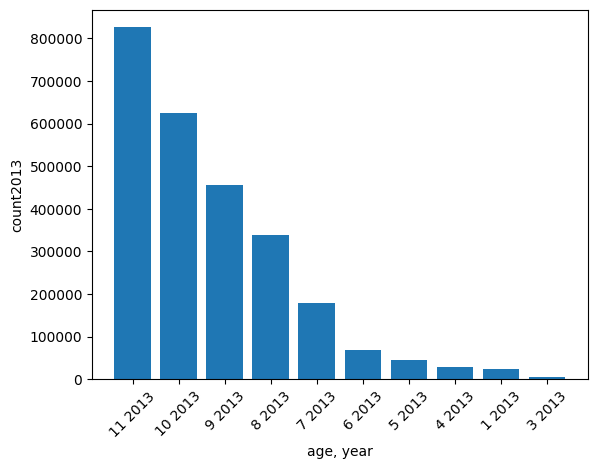

In [75]:
_.bar()

In [76]:
%%sql
DROP TABLE IF EXISTS Ageyeardeath2;
CREATE TABLE Ageyeardeath2 AS
SELECT age_recode_12 AS age,current_data_year AS year,count(*) AS count2014 from DeathInformation as di inner join DEATHS_USA as D on
di.key=D.deathinformation_key inner join Primary_info as inf on inf.key=D.info_key inner join Date as date on date.key=D.date_key
where current_data_year = '2014'
Group by age_recode_12, current_data_year
Order by count (*)DESC

 * postgresql://student@/week11
Done.
12 rows affected.


[]

In [77]:
%%sql
select * from Ageyeardeath2
limit 10

 * postgresql://student@/week11
10 rows affected.


age,year,count2014
11,2014,826579
10,2014,625247
9,2014,472544
8,2014,349779
7,2014,176505
6,2014,71325
5,2014,47437
4,2014,28970
1,2014,23290
3,2014,5283


<BarContainer object of 10 artists>

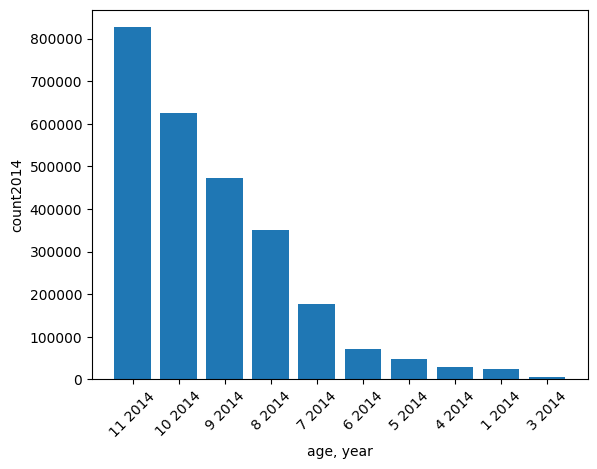

In [78]:
_.bar()

In [79]:
%%sql
DROP TABLE IF EXISTS Ageyeardeath3;
CREATE TABLE Ageyeardeath3 AS
SELECT age_recode_12 AS age,current_data_year AS year,count(*) AS count2015 from DeathInformation as di inner join DEATHS_USA as D on
di.key=D.deathinformation_key inner join Primary_info as inf on inf.key=D.info_key inner join Date as date on date.key=D.date_key
where current_data_year = '2015'
Group by age_recode_12, current_data_year
Order by count (*)DESC

 * postgresql://student@/week11
Done.
12 rows affected.


[]

In [80]:
%%sql
select * from Ageyeardeath3
limit 10

 * postgresql://student@/week11
10 rows affected.


age,year,count2015
11,2015,860145
10,2015,638426
9,2015,496187
8,2015,358984
7,2015,175162
6,2015,73458
5,2015,51794
4,2015,30690
1,2015,23526
3,2015,5454


<BarContainer object of 10 artists>

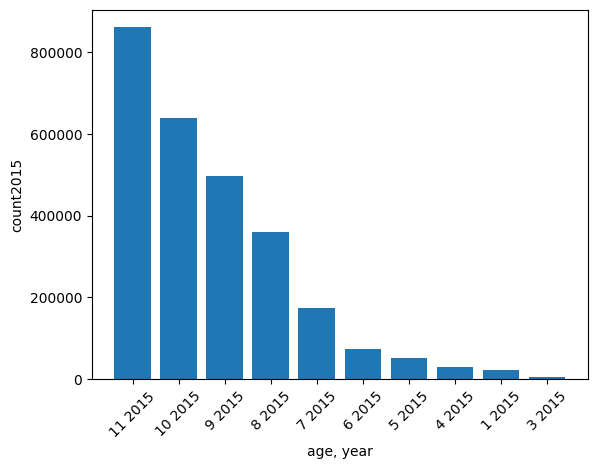

In [81]:
_.bar()

In [82]:
%%sql
select sum(count2015) from Ageyeardeath3

 * postgresql://student@/week11
1 rows affected.


sum
2718198


In the above visualizations, we have performed a basic analysis to obtain the distribution of the number of deaths across the age groups in 2013, 2014 and 2015. We have noted that there is no significant rise or drop in the number of deaths accross any of the age groups. 

For example we consistently note that over the three year age groups 9,10,11 have the highest death numbers. Age groups 9, 10 and 11 stand for 65-74 years, 75-84 years and 85 years & above. For further analysis of 2015 deaths we have grouped age groups into three categories to obtain a broader perspective of death distribution over the age categories. 

In [83]:
%%sql
DROP TABLE IF EXISTS Agedeath1;
CREATE TABLE Agedeath1 AS
SELECT age_recode_12 AS age,current_data_year AS year,count(*) AS count1 from DeathInformation as di inner join DEATHS_USA as D on
di.key=D.deathinformation_key inner join Primary_info as inf on inf.key=D.info_key inner join Date as date on date.key=D.date_key
where current_data_year = '2015'
AND age_recode_12 < 5
Group by age_recode_12, current_data_year
Order by count (*)DESC

 * postgresql://student@/week11
Done.
4 rows affected.


[]

In [84]:
%%sql
select sum(count1) from Agedeath1

 * postgresql://student@/week11
1 rows affected.


sum
63669


In [85]:
%%sql
DROP TABLE IF EXISTS Agedeath2;
CREATE TABLE Agedeath2 AS
SELECT age_recode_12 AS age,current_data_year AS year,count(*) AS count1 from DeathInformation as di inner join DEATHS_USA as D on
di.key=D.deathinformation_key inner join Primary_info as inf on inf.key=D.info_key inner join Date as date on date.key=D.date_key
where current_data_year = '2015'
AND age_recode_12 BETWEEN 5 and 7
Group by age_recode_12, current_data_year
Order by count (*)DESC

 * postgresql://student@/week11
Done.
3 rows affected.


[]

In [86]:
%%sql
select sum(count1) from Agedeath2

 * postgresql://student@/week11
1 rows affected.


sum
300414


In [87]:
%%sql
DROP TABLE IF EXISTS Agedeath3;
CREATE TABLE Agedeath3 AS
SELECT age_recode_12 AS age,current_data_year AS year,count(*) AS count1 from DeathInformation as di inner join DEATHS_USA as D on
di.key=D.deathinformation_key inner join Primary_info as inf on inf.key=D.info_key inner join Date as date on date.key=D.date_key
where current_data_year = '2015'
AND age_recode_12 > 7
Group by age_recode_12, current_data_year
Order by count (*)DESC

 * postgresql://student@/week11
Done.
5 rows affected.


[]

In [88]:
%%sql
select sum(count1) from Agedeath3

 * postgresql://student@/week11
1 rows affected.


sum
2354115


To further analyze the number of deaths within age groups, we grouped the age_recode_12 into broader categories as follows:
* 1-5 (<5) which includes age groups under 1 year, 1-4 years, 5-14 years and 15-24 years. This group represents 2.34% of the deaths.
* 5-7 (Between 5 - 7) includes age groups 25-34 years, 35-44 years and 45-54 years that represent 11.05% of deaths.
* Above 7 (>7) includes 55-64 years, 65-74 years, 75-84 years and above 85 years who represent 86.61% of the deaths.

This statistic is logical in the sense that majority of the deaths occur at older ages mostly due the individuals age itself and low immunity against diseases which make them weaker and eventually cause their death.

##### Heart disease analysis for all age groups:

In [89]:
%%sql
DROP TABLE IF EXISTS Heart_Disease;
CREATE TABLE Heart_Disease AS
SELECT  "39_cause_recode" AS cause, age_recode_12 AS age,count(*) AS count1 from DeathInformation as di inner join DEATHS_USA as D on
di.key=D.deathinformation_key inner join Primary_info as inf on inf.key=D.info_key
where "39_cause_recode"=22
AND age_recode_12<12
group by "cause", age

ORDER BY age DESC

 * postgresql://student@/week11
Done.
11 rows affected.


[]

In [90]:
%%sql
select * from Heart_Disease

 * postgresql://student@/week11
11 rows affected.


cause,age,count1
22,11,284286
22,10,149078
22,9,87353
22,8,56875
22,7,28438
22,6,11426
22,5,5823
22,4,2350
22,3,547
22,2,447


The age groups are defined as follows:
* 1 - Under 1 year
* 2 - 1 to 4 years
* 3 - 5 to 14 years
* 4 - 15 to 24 years
* 5 - 25 to 34 years
* 6 - 35 to 44 years
* 7 - 45 to 54 years
* 8 - 55 to 64 years
* 9 - 65 to 74 years
* 10 - 75 to 84 years
* 11 - 85 years and over

*As it can be seen from the table the most number of deaths by heart disease is in the age groups 8-11. This provides as proof to common knowledge that older individuals are more prone to heart disease. For those above 85 years old, it would be best to believe it as a natural cause of death due to old age but for the other age groups we could consider further analysis on how to improve the longetivity for senior citizens. This analytical data could provided to organizations that take care of health requirements, it would help them to better cater to the correct age groups provide them with the guidelines for a lifestyle that would improve their heart health.* 

<BarContainer object of 11 artists>

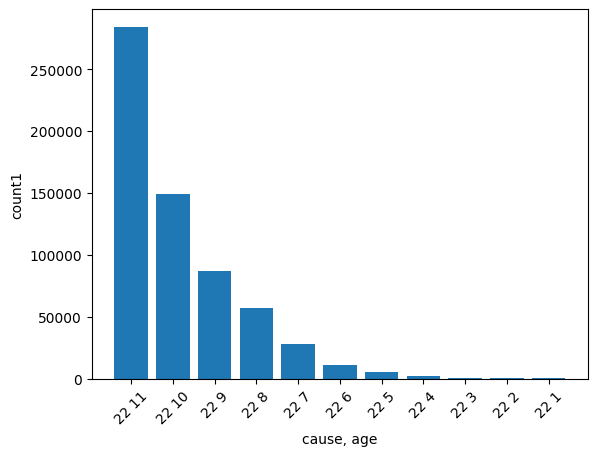

In [91]:
_.bar()

In [92]:
%%sql
select sum(count1) from Heart_Disease

 * postgresql://student@/week11
1 rows affected.


sum
627517


In [122]:
%%sql
DROP TABLE IF EXISTS Heart_Disease_above55;
CREATE TABLE Heart_Disease_above55 AS
select "39_cause_recode" AS cause, age_recode_12 AS age,count(*) AS count2 from DeathInformation as di inner join DEATHS_USA as D on
di.key=D.deathinformation_key inner join Primary_info as inf on inf.key=D.info_key 
where "39_cause_recode"=22 AND age_recode_12>7 AND age_recode_12<12
group by "cause", age
ORDER BY count(*) DESC

 * postgresql://student@/week11
Done.
4 rows affected.


[]

In [123]:
%%sql
select * from Heart_Disease_above55

 * postgresql://student@/week11
4 rows affected.


cause,age,count2
22,11,284286
22,10,149078
22,9,87353
22,8,56875


In [124]:
%%sql
select sum(count2) from Heart_Disease_above55

 * postgresql://student@/week11
1 rows affected.


sum
577592


*From the heart disease table we computed the total number of deaths due to heart disease is 577,592 out of which 627,517 belong to the age categories of 55+. This forms around 92.04%.*

In [96]:
%%sql
DROP TABLE IF EXISTS causeplace;
CREATE TABLE causeplace AS
select "39_cause_recode" AS Cause,place_of_death_and_decedents_status AS Place, marital_status AS marital,count(*) from DeathInformation as di inner join DEATHS_USA as D on
di.key=D.deathinformation_key inner join Location as loc on loc.key=D.location_key inner join Primary_info as inf on inf.key=D.info_key
where "39_cause_recode" =22
AND place_of_death_and_decedents_status= 4
group by "39_cause_recode", place_of_death_and_decedents_status, marital_status
ORDER BY Count(*) DESC

 * postgresql://student@/week11
Done.
5 rows affected.


[]

In [97]:
%%sql
select * from causeplace
limit 5

 * postgresql://student@/week11
5 rows affected.


cause,place,marital,count
22,4,W,74921
22,4,M,60003
22,4,D,22236
22,4,S,14277
22,4,U,787


In [98]:
%%sql
select sum(count) from causeplace

 * postgresql://student@/week11
1 rows affected.


sum
172224


In [99]:
%%sql
DROP TABLE IF EXISTS causeplace;
CREATE TABLE causeplace AS
select "39_cause_recode" AS Cause,place_of_death_and_decedents_status,marital_status AS marital,count(*) from DeathInformation as di inner join DEATHS_USA as D on
di.key=D.deathinformation_key inner join Location as loc on loc.key=D.location_key inner join Primary_info as inf on inf.key=D.info_key
where "39_cause_recode" =22
AND place_of_death_and_decedents_status= 4
AND marital_status ='M'
group by "39_cause_recode", place_of_death_and_decedents_status,marital_status
ORDER BY Count(*) DESC

 * postgresql://student@/week11
Done.
1 rows affected.


[]

In [100]:
%%sql
select * from causeplace

 * postgresql://student@/week11
1 rows affected.


cause,place_of_death_and_decedents_status,marital,count
22,4,M,60003


In the above analysis we have executed a query that would help us build a relationship between when the place of death is the decendent's home (represented by code 4) and what their respective marital status is. Our assumption in coming to an analysis for the above is that single(S), widowed(W), divorced(D) and unknown(U) lived alone until their death and married (M) individuals had been living with their partners. As per the results of the query we note that married individuals are less likely to pass due to a heart diease in comparison to the other category of individuals. The total deaths by heart disease at a decedent's home over the three years is 172,224 of which only 34.84% pertain to married individuals the balance 65.16% pertain to the those who live alone.

We assume, that the married individuals have one another to look after each other and should there be an emergency they are able to call for help immediately. The data can be used to curate various techniques that could assist those single individuals to call for help immediately when they feel unwell. Example tech companies can build an app that monitors health data for these individuals and provides them with an emergency button to press whwnever they feel unwell. Another recommendation would be to hire more healthcare workers that would go in to check the health of these individuals at regular intervals and ensure they are performing regular tests from time to time.

#### Question 2: Is there any difference in the top 3 death causes for single people versus married people at certain ages? If so, what is that death cause? What preventive measures could we do to increase those individual's lifespan?

*Completed by Man Kuei Chen*

#### We check the number of deaths in all age groups of single and married couple seperately to find out at what age do most single people and most married people die.

In [101]:
%%sql
select marital_status,age_recode_12, count(*) 
FROM Primary_info as inf 
inner join DEATHS_USA as D
on inf.key = D.info_key 
where marital_status = 'S'
group by marital_status,age_recode_12
order by age_recode_12 
limit 10

 * postgresql://student@/week11
10 rows affected.


marital_status,age_recode_12,count
S,1,70313
S,2,11942
S,3,16107
S,4,83590
S,5,99224
S,6,84537
S,7,144566
S,8,182141
S,9,123114
S,10,93624


In [102]:
%matplotlib inline

<BarContainer object of 10 artists>

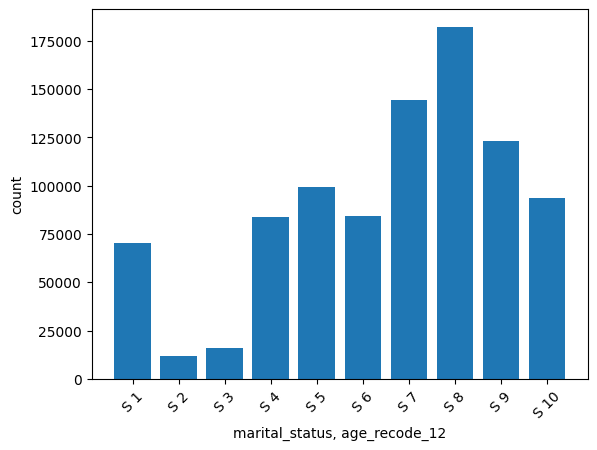

In [103]:
_.bar()

###### Age_recode_12: 
###### 1 - Under 1 year (includes not stated infant ages) 
###### 2 - 1-4years
###### 3 - 5-14years
###### 4 - 15 - 24 years
###### 5 - 25 - 34 years
###### 6 - 35 - 44 years
###### 7 - 45 - 54 years
###### 8 - 55 - 64 years
###### 9 - 65 - 74 years
###### 10 - 75 - 84 years
###### 11 - 85 years and over 
###### 12 - Age not stated

In [104]:
%%sql
select marital_status,age_recode_12, count(*) 
FROM Primary_info as inf 
inner join DEATHS_USA as D
on inf.key = D.info_key 
where marital_status = 'M'
group by marital_status,age_recode_12
order by age_recode_12 
limit 10

 * postgresql://student@/week11
10 rows affected.


marital_status,age_recode_12,count
M,3,3
M,4,3835
M,5,32222
M,6,80780
M,7,215975
M,8,474920
M,9,720864
M,10,843923
M,11,579017
M,12,20


<BarContainer object of 10 artists>

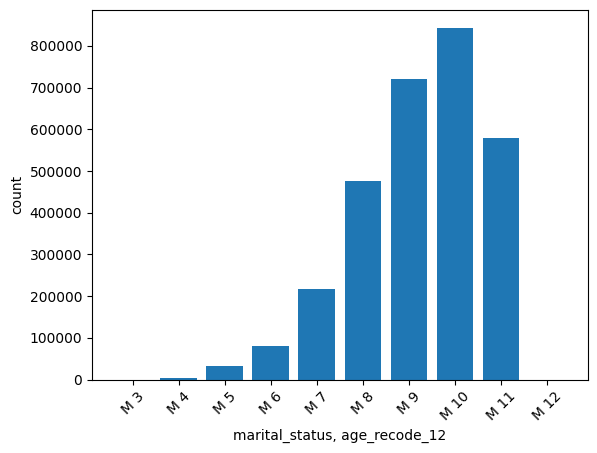

In [105]:
_.bar()

###### Age_recode_12: 
###### 1 - Under 1 year (includes not stated infant ages) 
###### 2 - 1-4years
###### 3 - 5-14years
###### 4 - 15 - 24 years
###### 5 - 25 - 34 years
###### 6 - 35 - 44 years
###### 7 - 45 - 54 years
###### 8 - 55 - 64 years
###### 9 - 65 - 74 years
###### 10 - 75 - 84 years
###### 11 - 85 years and over 
###### 12 - Age not stated

##### The above bar charts depict that amongst single individuals, more people have died in the age group of 55-64 years in comparison to the other age groups. Amidst married individuals, more people have died in the age group of 75-84 years as compared to other age groups.

#### Why did most singles die at such relatively young age over the three years? We analyse top 3 death causes of single and top 3 death causes of  married individuals to identify whether there are potential associations.

In [106]:
%%sql
select marital_status,age_recode_12,"39_cause_recode", count(*) 
FROM Primary_info as inf 
inner join DEATHS_USA as D
on inf.key = D.info_key 
inner join DeathInformation as di 
on di.key = D.deathinformation_key 
inner join Location as loc 
on D.Location_key = loc.key
where marital_status = 'S' and age_recode_12 = 8 
group by marital_status,"39_cause_recode",age_recode_12
order by count(*) desc
limit 3

 * postgresql://student@/week11
3 rows affected.


marital_status,age_recode_12,39_cause_recode,count
S,8,37,31589
S,8,21,26486
S,8,15,14993


<BarContainer object of 3 artists>

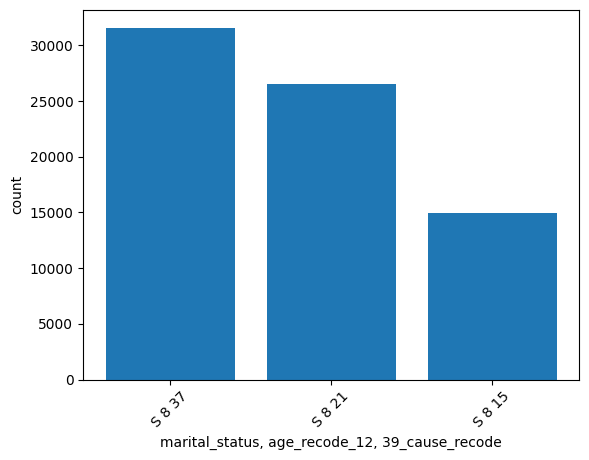

In [107]:
_.bar()

###### 39_cause_recode: 
###### 37 - All other diseases 
###### 21 - Ischemic heart diseases
###### 15 - Other malignant neoplasms (cancer)

In [108]:
%%sql
select marital_status,age_recode_12,"39_cause_recode", count(*) 
FROM Primary_info as inf 
inner join DEATHS_USA as D
on inf.key = D.info_key 
inner join DeathInformation as di 
on di.key = D.deathinformation_key 
inner join Location as loc 
on D.Location_key = loc.key
where marital_status = 'M' and age_recode_12 = 10
group by marital_status,"39_cause_recode",age_recode_12
order by count(*) desc
limit 3

 * postgresql://student@/week11
3 rows affected.


marital_status,age_recode_12,39_cause_recode,count
M,10,37,168378
M,10,21,119767
M,10,22,64095


<BarContainer object of 3 artists>

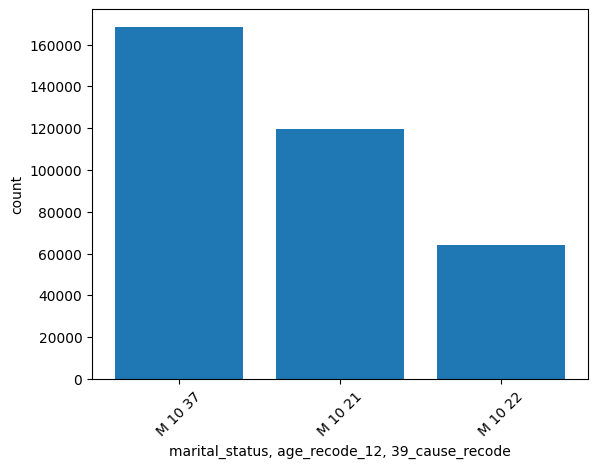

In [109]:
_.bar()

###### 39_cause_recode: 
###### 37 - All other diseases 
###### 21 - Ischemic heart diseases
###### 22 - Other diseases of heart

##### It stood out to us that the death cause "15 - cancer" , might play an important role. Further, we take a look at whether marital status potentially impacts cancer mortality.

In [110]:
%%sql
select marital_status,age_recode_12,"39_cause_recode", count(*) 
FROM Primary_info as inf 
inner join DEATHS_USA as D
on inf.key = D.info_key 
inner join DeathInformation as di 
on di.key = D.deathinformation_key 
inner join Location as loc 
on D.Location_key = loc.key
where marital_status = 'S' and "39_cause_recode" = 15
group by marital_status,"39_cause_recode",age_recode_12
order by age_recode_12 
limit 10

 * postgresql://student@/week11
10 rows affected.


marital_status,age_recode_12,39_cause_recode,count
S,1,15,105
S,2,15,641
S,3,15,1828
S,4,15,2504
S,5,15,2759
S,6,15,3115
S,7,15,8877
S,8,15,14993
S,9,15,9203
S,10,15,4777


<BarContainer object of 10 artists>

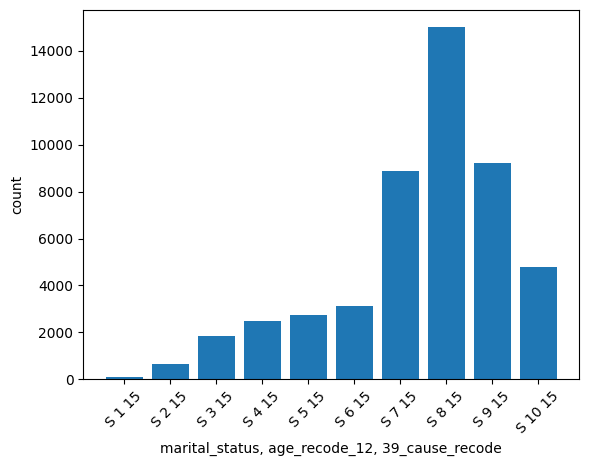

In [111]:
_.bar()

###### Age_recode_12: 
###### 1 - Under 1 year (includes not stated infant ages) 
###### 2 - 1-4years
###### 3 - 5-14years
###### 4 - 15 - 24 years
###### 5 - 25 - 34 years
###### 6 - 35 - 44 years
###### 7 - 45 - 54 years
###### 8 - 55 - 64 years
###### 9 - 65 - 74 years
###### 10 - 75 - 84 years
###### 11 - 85 years and over 
###### 12 - Age not stated

In [112]:
%%sql
select marital_status,age_recode_12,"39_cause_recode", count(*) 
FROM Primary_info as inf 
inner join DEATHS_USA as D
on inf.key = D.info_key 
inner join DeathInformation as di 
on di.key = D.deathinformation_key 
inner join Location as loc 
on D.Location_key = loc.key
where marital_status = 'M' and "39_cause_recode" = 15
group by marital_status,"39_cause_recode",age_recode_12
order by age_recode_12 
limit 10

 * postgresql://student@/week11
10 rows affected.


marital_status,age_recode_12,39_cause_recode,count
M,3,15,1
M,4,15,167
M,5,15,1856
M,6,15,6022
M,7,15,21155
M,8,15,56736
M,9,15,73663
M,10,15,59416
M,11,15,22958
M,12,15,2


<BarContainer object of 10 artists>

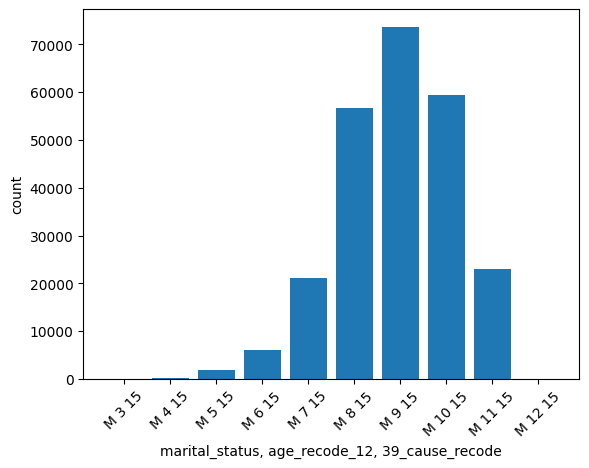

In [113]:
_.bar()

###### Age_recode_12: 
###### 1 - Under 1 year (includes not stated infant ages) 
###### 2 - 1-4years
###### 3 - 5-14years
###### 4 - 15 - 24 years
###### 5 - 25 - 34 years
###### 6 - 35 - 44 years
###### 7 - 45 - 54 years
###### 8 - 55 - 64 years
###### 9 - 65 - 74 years
###### 10 - 75 - 84 years
###### 11 - 85 years and over 
###### 12 - Age not stated

##### The result highlights the potential impact marital status and likely the support shared by married individuals can have on cancer mortality. Fo example, lacking support from spouses can lead to lower cancer screening rates and poorer lifestyle choices. We suggest companies, such as pharmaceutical and biomedical, design cancer screening and prevention products targeting the single individuals population. Additionally, we have found a research that supports our conclusion -  https://ascopubs.org/doi/abs/10.1200/JCO.2013.49.6489?role=tab¶

#### Question 3: What manner of death and age groups have the highest count of autopsies performed after death? What is the relationship between manner of death and autopsy in relation to age?

*Completed by Sibeso Mubonda*

First, we select manner of death and autopsy by count where autopsy = Y. This means that we are getting the manner of deaths that had autopsies performed and we order by count.

In [114]:
%%sql
SELECT manner_of_death,autopsy, Count(*)
FROM DeathInformation 
JOIN  DEATHS_USA
  ON Deaths_USA.deathinformation_key = deathinformation.key 
WHERE autopsy = 'Y'
GROUP BY manner_of_death,autopsy
ORDER BY COUNT DESC;

 * postgresql://student@/week11
7 rows affected.


manner_of_death,autopsy,count
7,Y,240167
1,Y,204492
2,Y,71024
3,Y,51152
5,Y,24743
0,Y,12595
4,Y,9120


The data dictionary for manner of death is as follows:
* 1 - Accident
* 2 - Suicide
* 3 - Homicide
* 4 - Pending Investigation
* 5 - Could not determine
* 6 - Self-Inflicted
* 7 - Natural
* 0 - Not Specified


*The most common manner of death is code 7 which is to Natural Cause. This is something we expected to happen because mostly, autopsies are performed when the cause of death is not as obvious as something like a homicide. So it makes sense for it to be the manner of death with the highest autopsy count*

<BarContainer object of 7 artists>

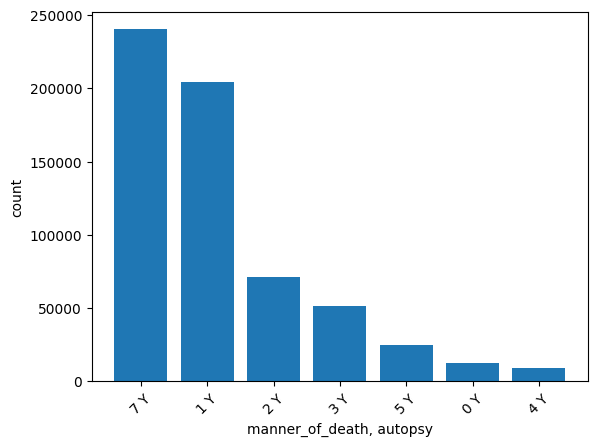

In [115]:
_.bar()

### Age in relation to autopsy performed and natural cause of death in 2013

Next, we want to see if there is an age range for people that died frrom natural causes that has the most autopsies performed over the three years, 2013-2015. To do this, we select age, autopsy and the manner of death where it is equal to 7(Natural Cause), where autopsy is equal to Y and the year is 2013.

In [116]:
%%sql
SELECT DISTINCT age_recode_12,autopsy,manner_of_death, Count(*)
FROM Primary_info
AS inf inner join Deaths_USA as D
  ON inf.key = D.info_key
INNER JOIN DeathInformation AS di on D.deathinformation_key = di.key
INNER JOIN Date AS da on D.date_key = da.key
WHERE current_data_year = '2013'
AND autopsy = 'Y'
AND
manner_of_death = 7
GROUP BY age_recode_12,autopsy,manner_of_death
ORDER BY manner_of_death, COUNT DESC;

 * postgresql://student@/week11
12 rows affected.


age_recode_12,autopsy,manner_of_death,count
8,Y,7,20875
7,Y,7,18587
9,Y,7,11688
6,Y,7,9195
10,Y,7,6045
5,Y,7,4563
1,Y,7,3233
11,Y,7,3071
4,Y,7,1883
3,Y,7,701


<BarContainer object of 12 artists>

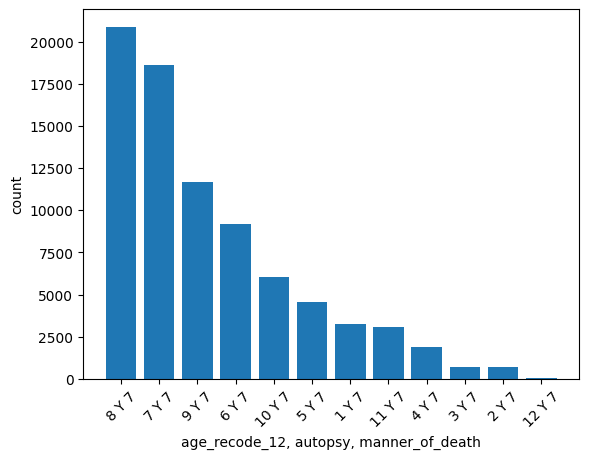

In [117]:
_.bar()

The dictionary for age_recode_12 is as follows:
Age Recode 12
* 01 ... Under 1 year (includes not stated infant ages)
* 02 ... 1-4years
* 03 ... 5-14years
* 04 ... 15 - 24 years
* 05 ... 25 - 34 years
* 06 ... 35 - 44 years
* 07 ... 45 - 54 years
* 08 ... 55 - 64 years
* 09 ... 65 - 74 years
* 10 ... 75 - 84 years
* 11 ... 85 years and over 
* 12 ... Age not stated

*The age group with the highest count of autopsies performed in 2013 that died from natural causes is 8 which refers to people around the age of 55-64 years old. This is something we expected because we believe that age group would be the one that has the most natural causes of death due to them being older and probably less healthier than the younger people. The age groups that follow in having the highest counts are 7 which is 45-54 years and 9 which is 65-74 years. As mentioned above, these are the results we expected due to the age groups being older meanning they would most likely be the ones to pass away due to natural causes as compared to the younger age groups.*

### Age groups that had autopsies performed after dying from natural causes in 2014

In [118]:
%%sql
SELECT DISTINCT age_recode_12,autopsy,manner_of_death, Count(*)
FROM Primary_info
AS inf inner join Deaths_USA as D
  ON inf.key = D.info_key
INNER JOIN DeathInformation AS di on D.deathinformation_key = di.key
INNER JOIN Date AS da on D.date_key = da.key
WHERE current_data_year = '2014'
AND autopsy = 'Y'
AND
manner_of_death = 7
GROUP BY age_recode_12,autopsy,manner_of_death
ORDER BY manner_of_death, COUNT DESC;

 * postgresql://student@/week11
12 rows affected.


age_recode_12,autopsy,manner_of_death,count
8,Y,7,21712
7,Y,7,18253
9,Y,7,12122
6,Y,7,9078
10,Y,7,5882
5,Y,7,4621
1,Y,7,3117
11,Y,7,3107
4,Y,7,1852
3,Y,7,698


<BarContainer object of 12 artists>

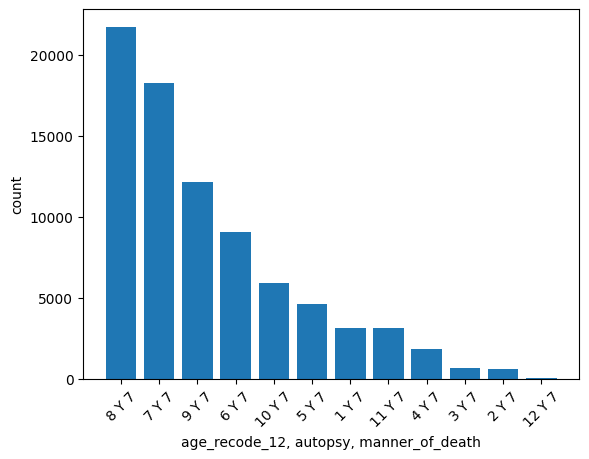

In [119]:
_.bar()

### Age groups that had autopsies performed after dying from natural causes in 2015

In [120]:
%%sql
SELECT DISTINCT age_recode_12,autopsy,manner_of_death, Count(*)
FROM Primary_info
AS inf inner join Deaths_USA as D
  ON inf.key = D.info_key
INNER JOIN DeathInformation AS di on D.deathinformation_key = di.key
INNER JOIN Date AS da on D.date_key = da.key
WHERE current_data_year = '2015'
AND autopsy = 'Y'
AND
manner_of_death = 7
GROUP BY age_recode_12,autopsy,manner_of_death
ORDER BY manner_of_death, COUNT DESC;

 * postgresql://student@/week11
12 rows affected.


age_recode_12,autopsy,manner_of_death,count
8,Y,7,20734
7,Y,7,17001
9,Y,7,12623
6,Y,7,8559
10,Y,7,5864
5,Y,7,4499
11,Y,7,3023
1,Y,7,3009
4,Y,7,1783
3,Y,7,703


<BarContainer object of 12 artists>

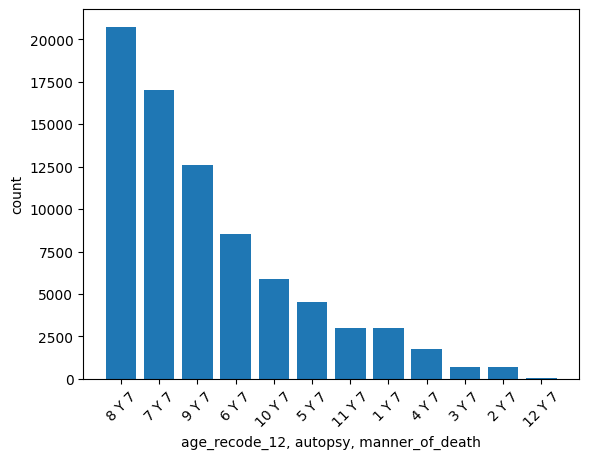

In [121]:
_.bar()

The age group with the highest count of autopsies performed in 2014 and 2015 are exactly the same as those in 2013. Those with the highest count that died from natural causes is group 8 which refers to people around the age of 55-64 years old. This is something we expected because we believe that age group would be the one that has the most natural causes of death due to them being older and probably less healthier than the younger folks. The age groups that follow in having the highest counts are 7 which is 45-54 years and 9 which is 65-74 years.

This is what we expected before the queries we ran to analyze the questions. This is because natural causes consist of things like diseases such as heart failure, cancer, diabetes and others. For the most part, these are diseases that are more prominent in people over certain ages and so it is not shocking to see the older deceased people have the highest count for having autopsies performed. 